# 예측값 데이터로 회사 및 연도별 esg 점수계산
- 2023/01/11

## 1.긍정1, 부정0 일경우

- 데이터 불러오기

In [2]:
import pandas as pd
predict1=pd.read_excel('./scored_koelectra_neg_0_2301111.xlsx')
predict1.head()

,id,year,doc,content,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,원수가 다니겠다고 하면 도시락 싸 들고 환영할 회사 중소기업의 흔한 사건사고 단점 ...,장점 꼰대 문화가 별로 없고 변화와 발전 추구함 투자를 많이 받고 있기 때문에 사...,0,4,3,0,7,0.0,0.0,0.0,0.0
1,1,2020,앞으로도 더 성장 할 가능성이 높은 회사,장점 직원들에게 많은 기회를 준다 한가지만 보지 않고 다양한 분야에서 어떻게 인재가...,0,0,2,1,2,0.0,0.0,1.0,1.0
2,1,2020,블리츠웨이 300 꿈의 장난감 볼트론 피규어로 매출 100억원 기대,피규어 전문제작사 블리츠웨이가 출시 예정인 볼트론이 사전예약 첫 날 자체 예약 최고...,0,0,0,1,0,0.0,0.0,0.0,0.0
3,1,2020,배용준도 투자한 블리츠웨이 코스닥 예비심사 통과 정밀 피규어 최초 상장 기대,피규어 개발 및 제작 전문 기업 블리츠웨이가 코스닥 상장을 위한 예비 심사를 통과했...,0,0,0,1,0,0.0,0.0,0.0,0.0
4,1,2020,대신밸런스제9호스팩 블리츠웨이와 합병 승인 12월 코스닥 상장,대신밸런스제9호스팩은 피규어 개발 제작 전문 기업 블리츠웨이 와 합병상장을 위한 ...,0,0,0,1,0,0.0,0.0,0.0,0.0


- 회사 및 연도별 esg_score groupby 

In [7]:
scoring_ver1=predict1.groupby(['id','year']).sum(['esg_score']).reset_index()

In [8]:
scoring_ver1

,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,1,5,9,13,15,0.5,0.500000,1.000000,2.0
1,1,2021,0,12,12,9,24,0.0,0.000000,2.000000,2.0
2,2,2020,3,10,12,16,25,1.0,1.416667,4.583333,7.0
3,2,2021,0,4,10,15,14,0.0,1.000000,6.000000,7.0
4,3,2020,0,11,26,18,37,0.0,4.166667,11.833333,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,1,1,0.0,0.000000,0.000000,0.0
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3.0
2553,1381,2021,0,3,2,1,5,0.0,0.666667,0.333333,1.0
2554,1382,2020,0,1,6,2,7,0.0,0.500000,1.500000,2.0


- 분포파악

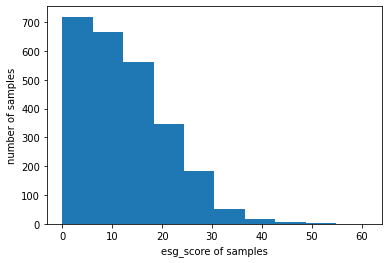

In [31]:
import matplotlib.pyplot as plt
plt.hist(scoring_ver1['esg_score'])
plt.xlabel('esg_score of samples'), plt.ylabel('number of samples');

In [25]:

scoring_ver1.loc[scoring_ver1['year'] == 2020]

,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,1,5,9,13,15,0.5,0.500000,1.000000,2.0
2,2,2020,3,10,12,16,25,1.0,1.416667,4.583333,7.0
4,3,2020,0,11,26,18,37,0.0,4.166667,11.833333,16.0
6,4,2020,2,8,13,15,23,2.0,0.750000,5.250000,8.0
8,5,2020,0,18,50,47,68,0.0,5.833333,26.166667,32.0
...,...,...,...,...,...,...,...,...,...,...,...
2545,1377,2020,0,23,37,12,60,0.0,1.333333,7.666667,9.0
2547,1378,2020,0,27,46,18,73,0.0,5.416667,12.583333,18.0
2549,1379,2020,0,0,1,1,1,0.0,0.000000,1.000000,1.0
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3.0


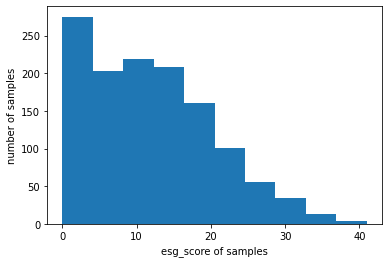

In [30]:
plt.hist(scoring_ver1.loc[scoring_ver1['year'] == 2020]['esg_score'])
plt.xlabel('esg_score of samples'), plt.ylabel('number of samples');

In [9]:
scoring_ver1.to_excel('./scoring_koelectra_cmp_year_2301111.xlsx')

 ## 2. 긍정1, 부정-1 일 경우

- 데이터 불러오기

In [10]:
import pandas as pd
predict2=pd.read_excel('./scored_koelectra_neg_minus1_2301111.xlsx')
predict2.head()

,id,year,doc,content,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,원수가 다니겠다고 하면 도시락 싸 들고 환영할 회사 중소기업의 흔한 사건사고 단점 ...,장점 꼰대 문화가 별로 없고 변화와 발전 추구함 투자를 많이 받고 있기 때문에 사...,0,4,3,-1,7,0.0,-0.571429,-0.428571,-1.0
1,1,2020,앞으로도 더 성장 할 가능성이 높은 회사,장점 직원들에게 많은 기회를 준다 한가지만 보지 않고 다양한 분야에서 어떻게 인재가...,0,0,2,1,2,0.0,0.000000,1.000000,1.0
2,1,2020,블리츠웨이 300 꿈의 장난감 볼트론 피규어로 매출 100억원 기대,피규어 전문제작사 블리츠웨이가 출시 예정인 볼트론이 사전예약 첫 날 자체 예약 최고...,0,0,0,1,0,0.0,0.000000,0.000000,0.0
3,1,2020,배용준도 투자한 블리츠웨이 코스닥 예비심사 통과 정밀 피규어 최초 상장 기대,피규어 개발 및 제작 전문 기업 블리츠웨이가 코스닥 상장을 위한 예비 심사를 통과했...,0,0,0,1,0,0.0,0.000000,0.000000,0.0
4,1,2020,대신밸런스제9호스팩 블리츠웨이와 합병 승인 12월 코스닥 상장,대신밸런스제9호스팩은 피규어 개발 제작 전문 기업 블리츠웨이 와 합병상장을 위한 ...,0,0,0,1,0,0.0,0.000000,0.000000,0.0


- 회사 및 연도별 esg_score groupby 

In [12]:
scoring_ver2=predict2.groupby(['id','year']).sum(['esg_score']).reset_index()
scoring_ver2

,id,year,ecnt,scnt,gcnt,predicted,tot_esg_cnt,e_score,s_score,g_score,esg_score
0,1,2020,1,5,9,10,15,0.5,-0.071429,-1.428571,-1.0
1,1,2021,0,12,12,2,24,0.0,-2.000000,-1.000000,-3.0
2,2,2020,3,10,12,7,25,0.0,-0.750000,0.750000,0.0
3,2,2021,0,4,10,9,14,0.0,-1.000000,3.000000,2.0
4,3,2020,0,11,26,13,37,0.0,3.666667,7.333333,11.0
...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,1,0.0,0.000000,-1.000000,-1.0
2552,1381,2020,0,1,3,3,4,0.0,0.500000,2.500000,3.0
2553,1381,2021,0,3,2,0,5,0.0,0.166667,-0.166667,0.0
2554,1382,2020,0,1,6,0,7,0.0,0.500000,-0.500000,0.0


In [13]:
scoring_ver2.to_excel('./scoring_neg_minus_koelectra_cmp_year_2301111.xlsx')

- 분포 파악

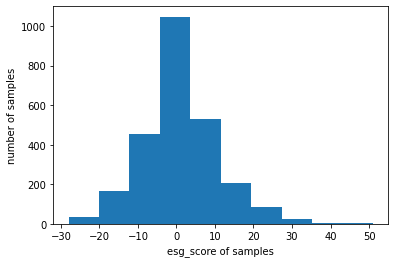

In [29]:
import matplotlib.pyplot as plt
plt.hist(scoring_ver2['esg_score'])
plt.xlabel('esg_score of samples'), plt.ylabel('number of samples');